#Credits
https://towardsdatascience.com/understanding-decision-tree-classification-with-scikit-learn-2ddf272731bd

USING CROSS VALIDATION
https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6
    

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#The train test split from sklearn
from sklearn.model_selection import train_test_split
#Importing the decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

In [3]:
#reading the dataset
file = "data/train_data.csv"
columns = ['Customer_id','year_of_observation','insured_period','residential','building_painted',
          'building_fenced','garden','settlement','building_dimension',
          'building_type','date_of_occupancy','number_of_windows','geo_code','claim']

df = pd.read_csv(file, index_col= False)

In [4]:
df.head(5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [5]:
df.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

# Missing Values

In [6]:
df.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [7]:
#Separating the dataset as per the two types of claims
df_0 = df[df['Claim']==0]
df_1 = df[df['Claim']==1]

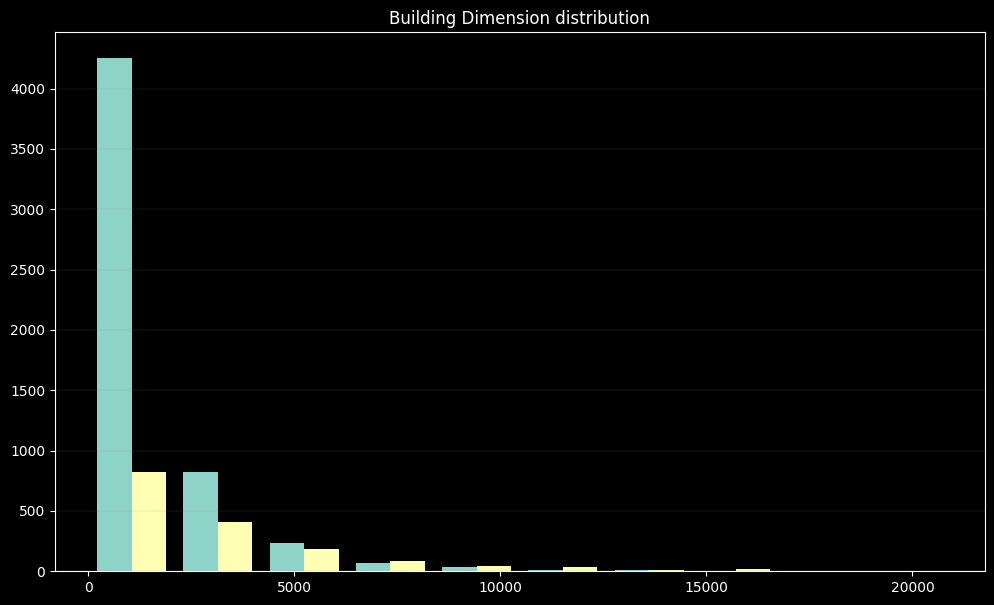

In [8]:
fig, ax = plt.subplots(figsize=(12,7))

#Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-',
        linewidth=0.25, alpha=0.5)

#Set the plot title

ax.set_title('Building Dimension distribution')

#Define the dataset 
buildingDimension = [df_0['Building Dimension'], df_1['Building Dimension']]

ax.hist(buildingDimension)

plt.show()

In [9]:
#Replacing missing value for building dimension using median
df['Building Dimension'].fillna(df['Building Dimension'].median, inplace=True)

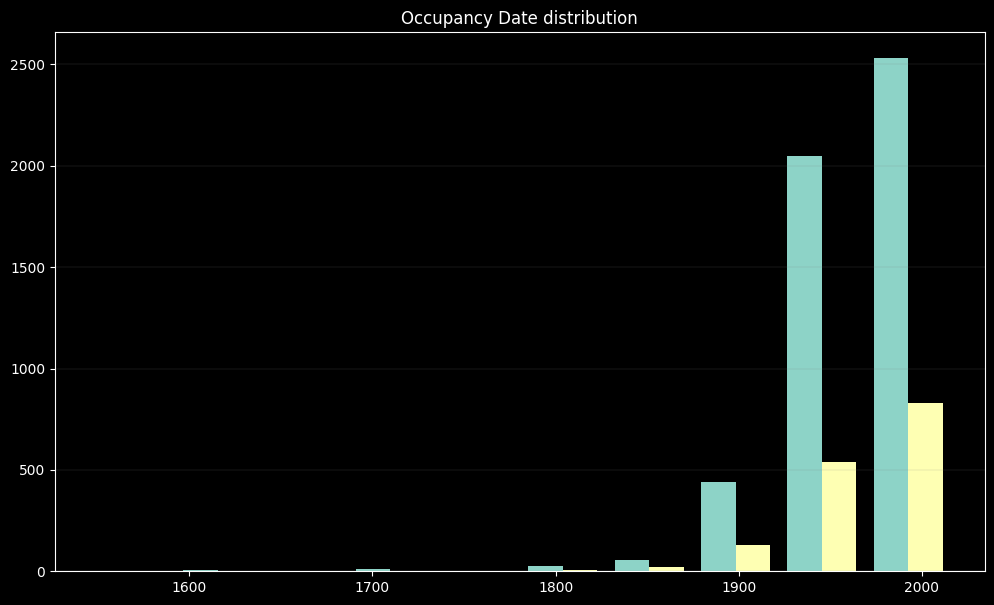

In [10]:
#Distribution for date of occupancy
fig, ax = plt.subplots(figsize=(12,7))

#Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-',
        linewidth=0.25, alpha=0.5)

#Set the plot title

ax.set_title('Occupancy Date distribution')

#Define the dataset 
occupancyDate = [df_0['Date_of_Occupancy'], df_1['Date_of_Occupancy']]

ax.hist(occupancyDate)

plt.show()

In [11]:
#Replacing missing value for date of occupancy using median
df['Date_of_Occupancy'].fillna(df['Date_of_Occupancy'].median, inplace=True)

In [12]:
df.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension     object
Building_Type           int64
Date_of_Occupancy      object
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

In [13]:
#Getting the number of categories in categorical variables
print("The number of categories in: ")


for colName in df[['Building_Painted','Building_Fenced','Garden',
                   'Settlement','NumberOfWindows','Geo_Code']]:
    print("{}={}".format(colName,
                        len(df[colName].unique())))

The number of categories in: 
Building_Painted=2
Building_Fenced=2
Garden=3
Settlement=2
NumberOfWindows=11
Geo_Code=1308


In [14]:
#Replacing all missing values in geo_code with a zero
df['Geo_Code'] = df['Geo_Code'].fillna(0)

In [15]:
#Replacing missing values with the mode
def mode_replace(dataframe, colName):
    #Get the most frequent category
    mode_cat = dataframe[colName].mode()[0]
    
    #Replace the missing values with the most occurring category
    dataframe[colName + "_Imputed"] = dataframe[colName]
    
    dataframe[colName + "_Imputed"].fillna(mode_cat, inplace=True)
    

In [16]:
#Calling the imputation function 
mode_replace(df, 'Garden')

In [17]:
df.head(5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,Garden_Imputed
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0,V
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0,O
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0,V
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0,V
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0,O


In [18]:
df['Garden'] = df['Garden_Imputed']

In [19]:
df = df.drop(['Garden_Imputed'], axis = 1)

# Exploratory Data Analysis 

In [20]:
#Descriptive analysis
df.iloc[:,[1,2,3,9,10,13]].describe()

,YearOfObservation,Insured_Period,Residential,Building_Type,Claim
count,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000
mean,2013.669553,0.909758,0.305447,2.186034,0.228212
std,1.383769,0.239756,0.460629,0.940632,0.419709
min,2012.000000,0.000000,0.000000,1.000000,0.000000
25%,2012.000000,0.997268,0.000000,2.000000,0.000000
50%,2013.000000,1.000000,0.000000,2.000000,0.000000
75%,2015.000000,1.000000,1.000000,3.000000,0.000000
max,2016.000000,1.000000,1.000000,4.000000,1.000000


In [21]:
#Visualization of categorical variables
def box_plot(dataframe, colName):
    
    fig, ax = plt.subplots(figsize=(12,7))

    #Add major gridlines in the y-axis
    ax.grid(color='grey', axis='y', linestyle='-',
        linewidth=0.25, alpha=0.5)
    ax.set_title(colName)
    ax.hist(dataframe[colName])
    plt.show()

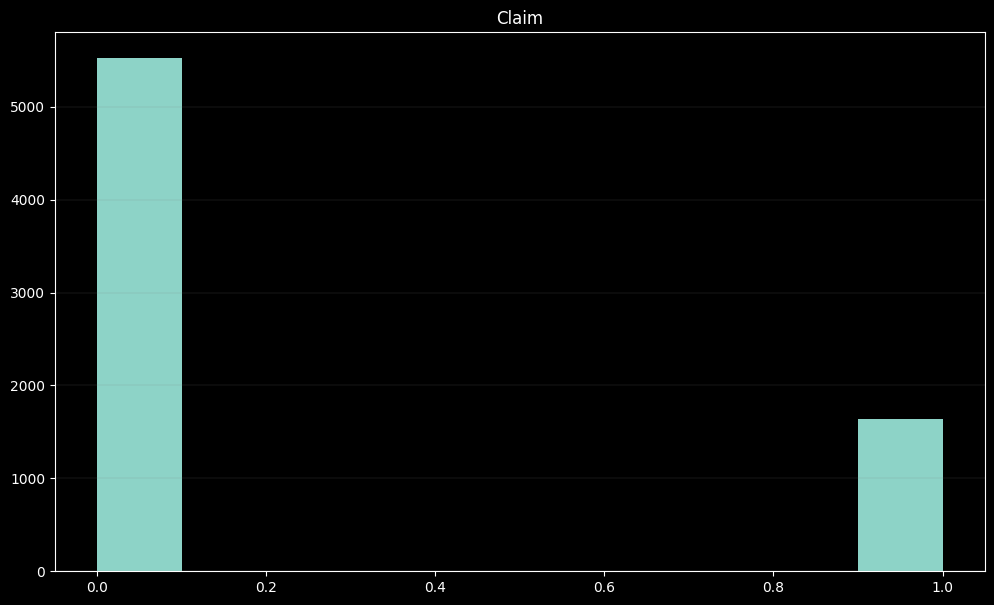

In [22]:
#Distribution of the target variable
col = 'Claim'
box_plot(df,col)
#Evidence of a highly imbalanced target variable

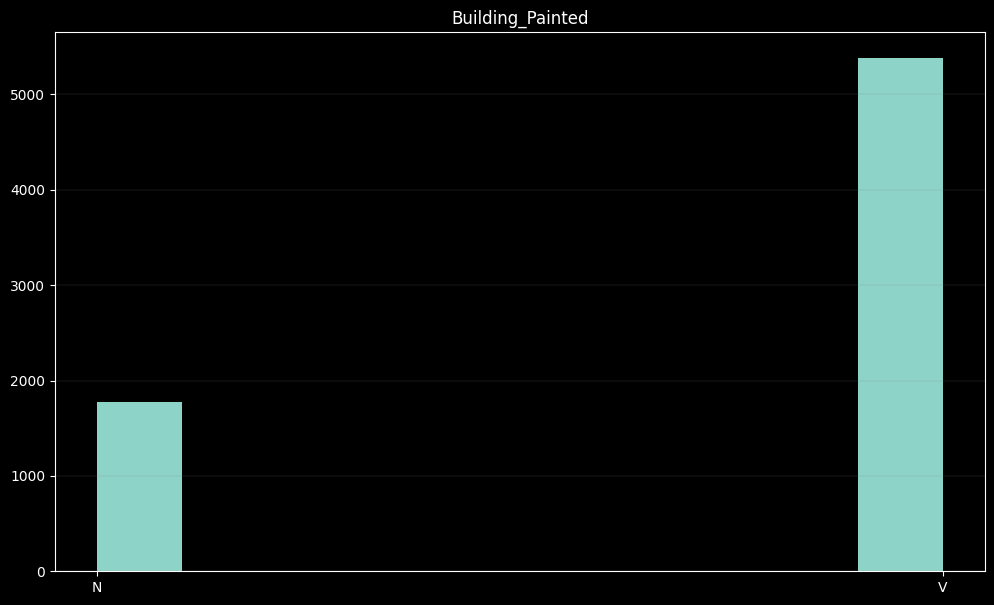

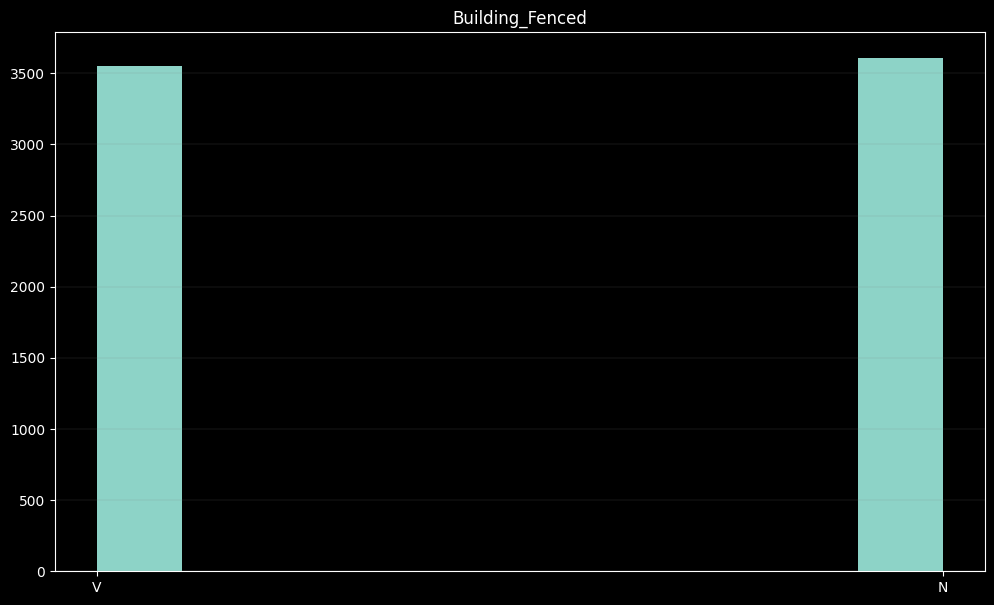

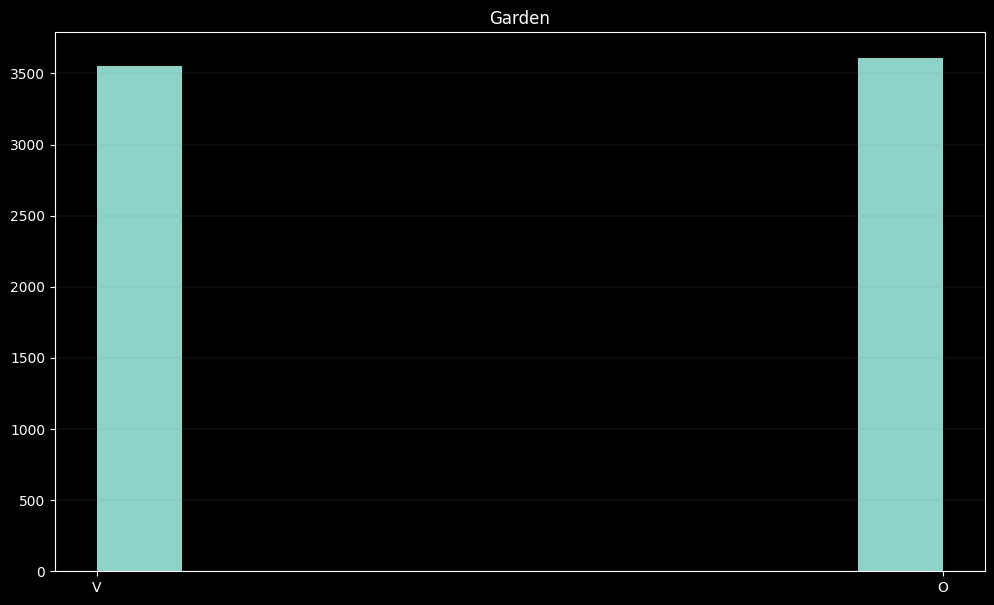

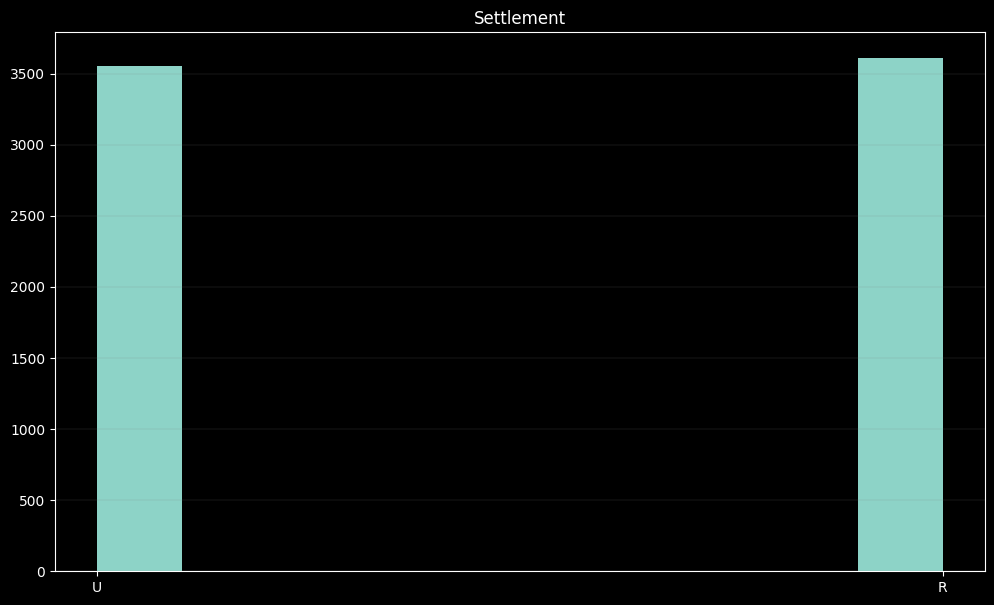

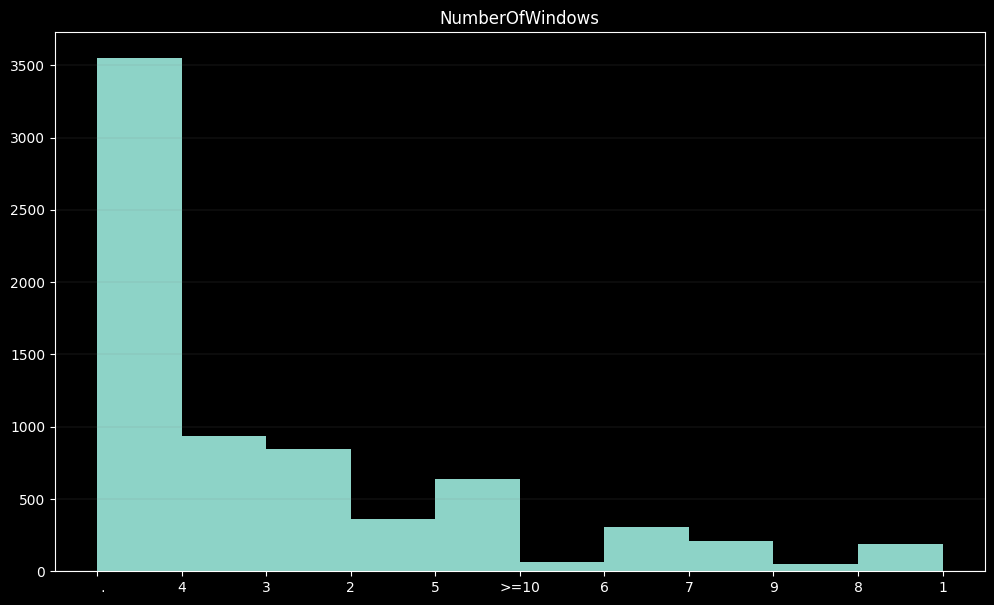

In [23]:
for column in df[['Building_Painted','Building_Fenced','Garden',
                   'Settlement','NumberOfWindows']]:
    box_plot(df, column)

In [24]:
#Separating the dataset as per the two types of claims for visualizations
df_0 = df[df['Claim']==0]
df_1 = df[df['Claim']==1]

In [25]:
#Checking variable distribution across the two categories using boxplots
def boxplot_cf(df1, df2, colName, label_name):
    fig, ax = plt.subplots(figsize=(12,7))

    #Add major gridlines in the y-axis
    ax.grid(color='grey', axis='y', linestyle='-',
            linewidth=0.25, alpha=0.5)

    #Set the plot title

    ax.set_title(colName)

    #Define the dataset 
    data = [df1[colName], df2[colName]]

    labels = df[label_name].unique()
    ax.boxplot(data, labels=labels)

    plt.show()

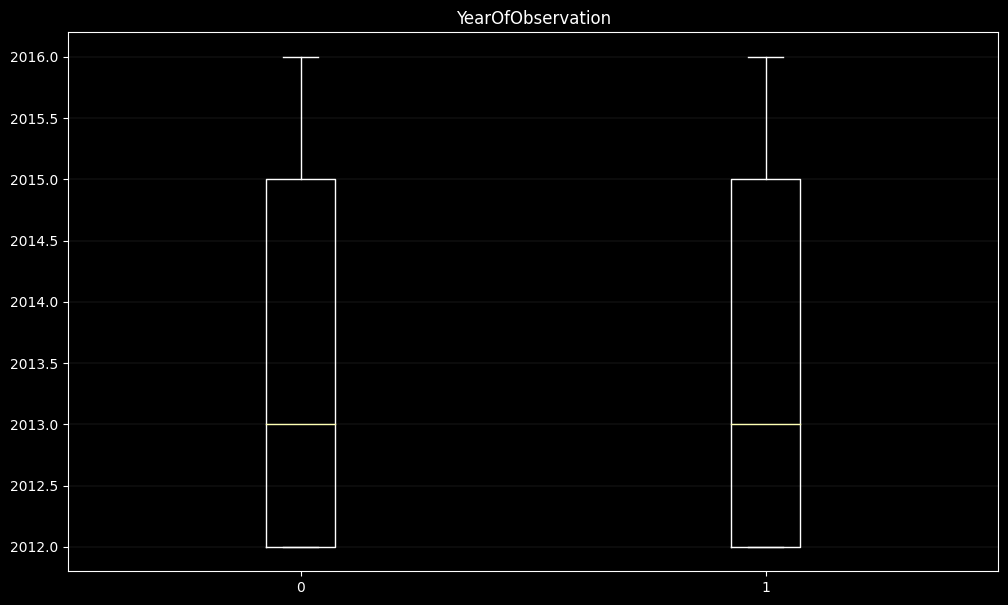

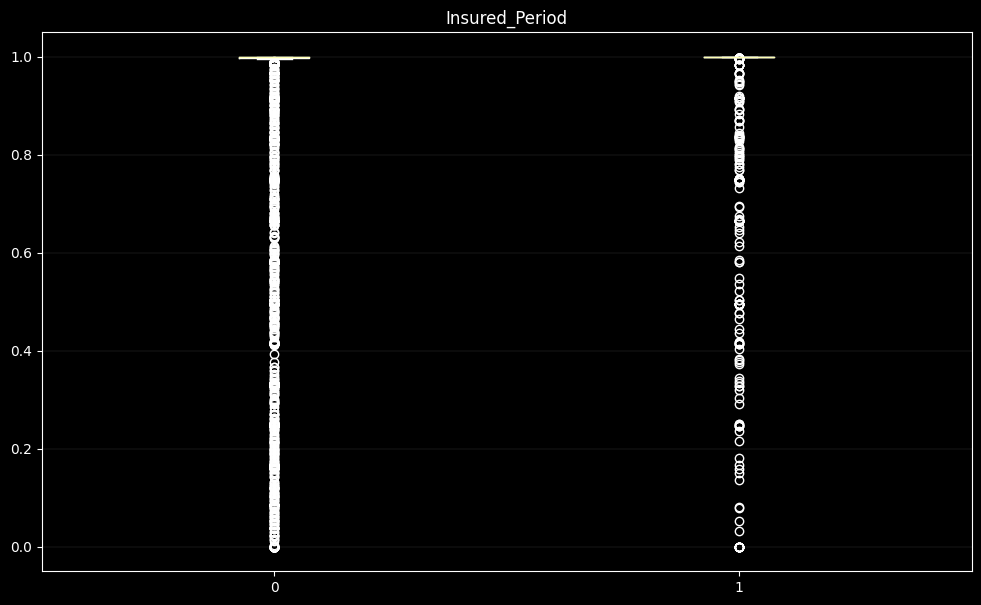

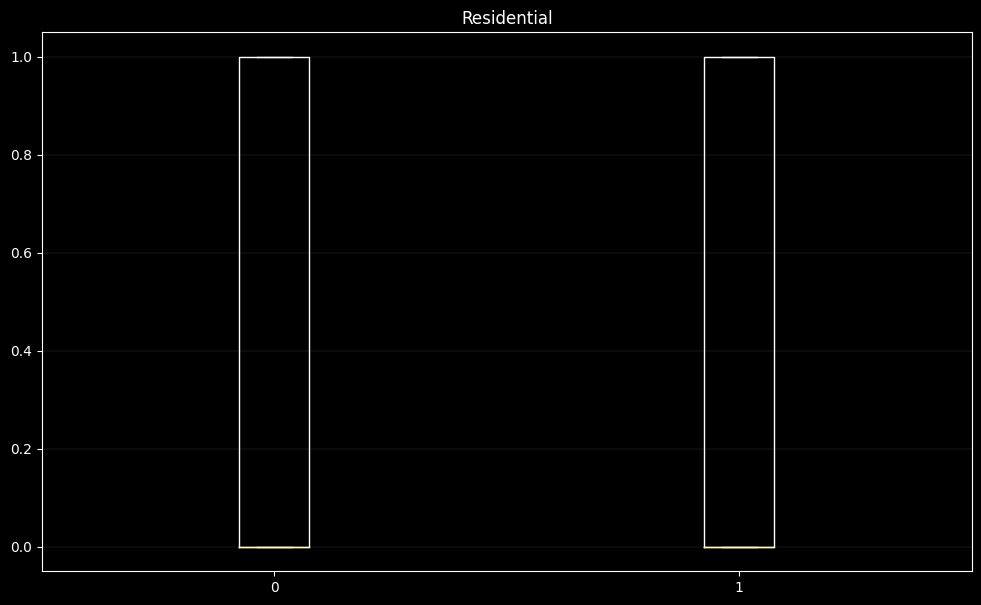

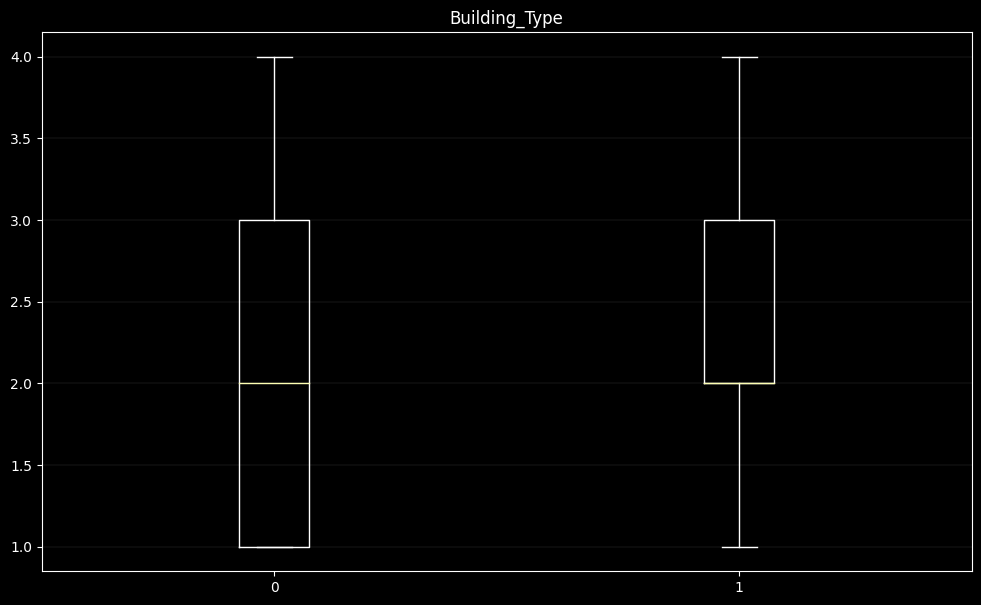

In [26]:
label_name = 'Claim'
column_names = ['YearOfObservation','Insured_Period','Residential','Building_Type']
for col in column_names:
    boxplot_cf(df_0,df_1,col, label_name)

Building_Painted     N     V  Total Count
Claim                                    
0                 1411  4115         5526
1                  367  1267         1634
Total Count       1778  5382         7160


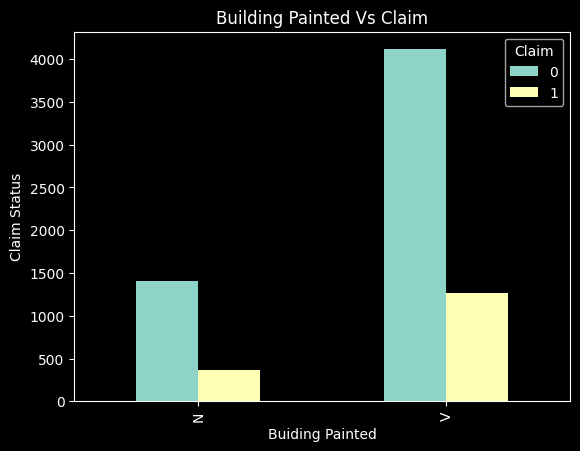

Building_Fenced     N     V  Total Count
Claim                                   
0                2707  2819         5526
1                 901   733         1634
Total Count      3608  3552         7160


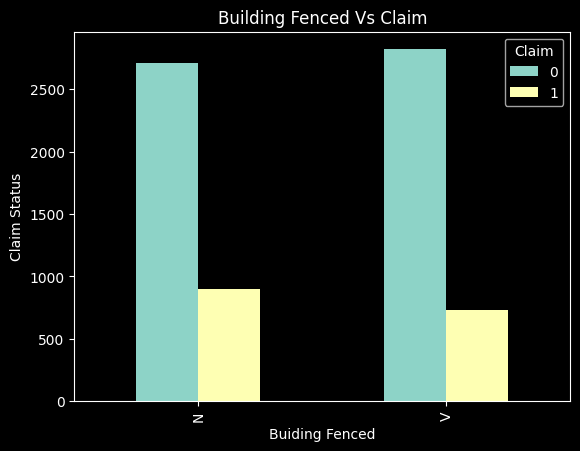

Garden          O     V  Total Count
Claim                               
0            2707  2819         5526
1             902   732         1634
Total Count  3609  3551         7160


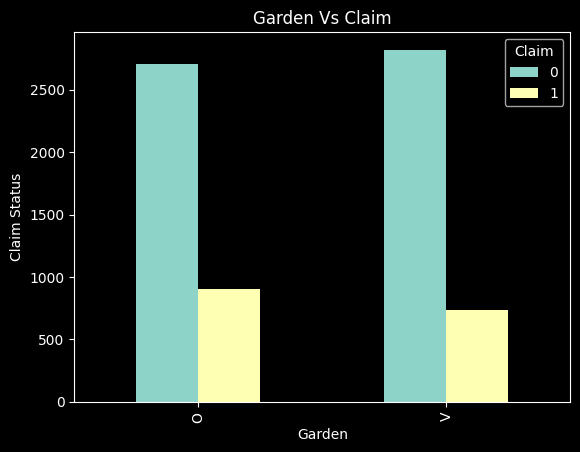

Settlement      R     U  Total Count
Claim                               
0            2708  2818         5526
1             902   732         1634
Total Count  3610  3550         7160


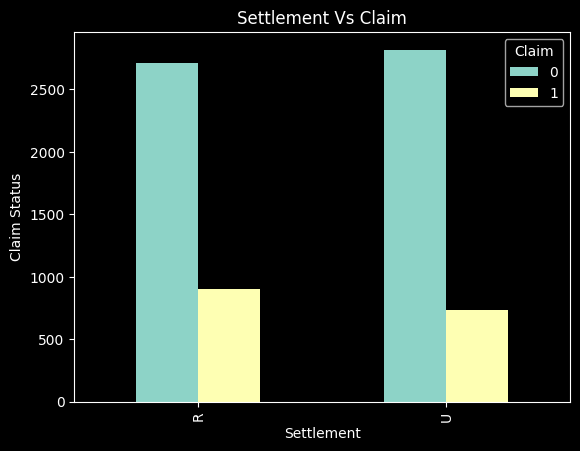

NumberOfWindows     .   1    2    3    4    5    6    7    8   9  >=10  \
Claim                                                                    
0                2819  68  323  713  717  447  201  121   61  24    32   
1                 732   7   40  131  222  192  105   90   55  25    35   
Total Count      3551  75  363  844  939  639  306  211  116  49    67   

NumberOfWindows  Total Count  
Claim                         
0                       5526  
1                       1634  
Total Count             7160  


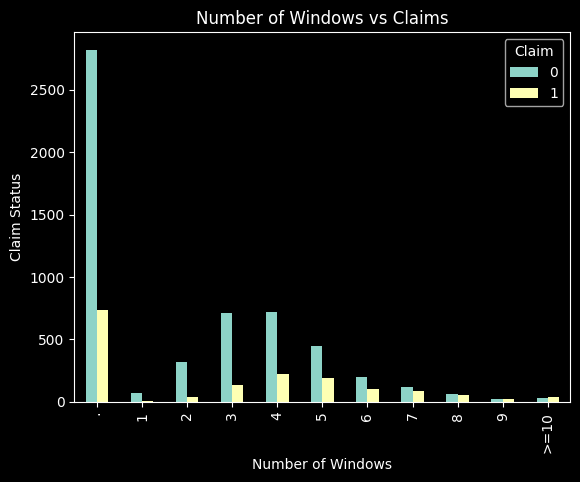

In [27]:
#Crosstabulation analysis for categorical variabels
[['Building_Painted','Building_Fenced','Garden',
                   'Settlement','NumberOfWindows']]
#print('Building Painted vs Claim')
print(pd.crosstab(df.Claim,df.Building_Painted, margins=True,margins_name ="Total Count"))
pd.crosstab(df.Building_Painted,df.Claim).plot(kind = 'bar')
plt.title('Building Painted Vs Claim')
plt.xlabel('Buiding Painted')
plt.ylabel('Claim Status')
plt.show()
          
#print('Building Fenced vs Claim')
print(pd.crosstab(df.Claim, df.Building_Fenced, margins=True, margins_name = "Total Count"))
pd.crosstab(df.Building_Fenced,df.Claim).plot(kind = 'bar')
plt.title('Building Fenced Vs Claim')
plt.xlabel('Buiding Fenced')
plt.ylabel('Claim Status')
plt.show()

#print('Garden vs Claim')
print(pd.crosstab(df.Claim, df.Garden, margins=True, margins_name = "Total Count"))
pd.crosstab(df.Garden,df.Claim).plot(kind = 'bar')
plt.title('Garden Vs Claim')
plt.xlabel('Garden')
plt.ylabel('Claim Status')
plt.show()

#print('Garden vs Settlement')
print(pd.crosstab(df.Claim, df.Settlement, margins=True, margins_name = "Total Count"))
pd.crosstab(df.Settlement,df.Claim).plot(kind = 'bar')
plt.title('Settlement Vs Claim')
plt.xlabel('Settlement')
plt.ylabel('Claim Status')
plt.show()
           
#print('Garden vs Number Of Windows')
print(pd.crosstab(df.Claim, df.NumberOfWindows, margins=True, margins_name = "Total Count"))  
pd.crosstab(df.NumberOfWindows,df.Claim).plot(kind = 'bar')
plt.title('Number of Windows vs Claims')
plt.xlabel('Number of Windows')
plt.ylabel('Claim Status')
plt.show()

# Feature Engineering

In [28]:
#We define two functions that will help create dummy variables 
def create_dummy(dataframe, cat_vars):
    
   
    for var in cat_vars:
        cat_list = 'var'+'_'+'var'
        cat_list = pd.get_dummies(dataframe[var], prefix=var)
        dataframe_new = dataframe.join(cat_list)
        dataframe = dataframe_new
    data_vars = dataframe.columns.values.tolist()
    to_keep = [i for i in data_vars if i not in cat_vars]
    
    dataframe_final = dataframe[to_keep]
    
    return dataframe_final


In [29]:
cat_vars = ['Building_Painted','Building_Fenced','Garden','Settlement','NumberOfWindows']

df_final = create_dummy(df, cat_vars)

In [30]:
df_final.head(5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Geo_Code,Claim,Building_Painted_N,...,NumberOfWindows_1,NumberOfWindows_2,NumberOfWindows_3,NumberOfWindows_4,NumberOfWindows_5,NumberOfWindows_6,NumberOfWindows_7,NumberOfWindows_8,NumberOfWindows_9,NumberOfWindows_>=10
0,H14663,2013,1.0,0,290.0,1,1960.0,1053,0,1,...,0,0,0,0,0,0,0,0,0,0
1,H2037,2015,1.0,0,490.0,1,1850.0,1053,0,0,...,0,0,0,1,0,0,0,0,0,0
2,H3802,2014,1.0,0,595.0,1,1960.0,1053,0,1,...,0,0,0,0,0,0,0,0,0,0
3,H3834,2013,1.0,0,2840.0,1,1960.0,1053,0,0,...,0,0,0,0,0,0,0,0,0,0
4,H5053,2014,1.0,0,680.0,1,1800.0,1053,0,0,...,0,0,1,0,0,0,0,0,0,0


# Decision Tree Modelling

In [31]:
df_final.dtypes

Customer Id              object
YearOfObservation         int64
Insured_Period          float64
Residential               int64
Building Dimension       object
Building_Type             int64
Date_of_Occupancy        object
Geo_Code                 object
Claim                     int64
Building_Painted_N        uint8
Building_Painted_V        uint8
Building_Fenced_N         uint8
Building_Fenced_V         uint8
Garden_O                  uint8
Garden_V                  uint8
Settlement_R              uint8
Settlement_U              uint8
NumberOfWindows_   .      uint8
NumberOfWindows_1         uint8
NumberOfWindows_2         uint8
NumberOfWindows_3         uint8
NumberOfWindows_4         uint8
NumberOfWindows_5         uint8
NumberOfWindows_6         uint8
NumberOfWindows_7         uint8
NumberOfWindows_8         uint8
NumberOfWindows_9         uint8
NumberOfWindows_>=10      uint8
dtype: object

In [32]:
#Convert the data types to float
df_final['Insured_Period'] = df_final['Insured_Period'].astype('int64')

In [33]:
df_final['Geo_Code'].unique()

array(['1053', '1143', '1160', ..., '2B096', '2B353', 0], dtype=object)

In [34]:
#Creating the featur and target datasets
#Preparing the feature and target data
X = df_final.drop(['Claim','Customer Id','Building Dimension','Date_of_Occupancy','Geo_Code'], axis = 1)
#X = df.iloc[:,9]
y = df_final['Claim']

In [35]:
['Claim','Customer Id','YearOfObservation','Insured_Period','Residential','Building Dimension',
                  'Building_Type','Date_of_Occupancy','Geo_Code']

['Claim',
 'Customer Id',
 'YearOfObservation',
 'Insured_Period',
 'Residential',
 'Building Dimension',
 'Building_Type',
 'Date_of_Occupancy',
 'Geo_Code']

In [36]:
X.head(5)

,YearOfObservation,Insured_Period,Residential,Building_Type,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_O,Garden_V,...,NumberOfWindows_1,NumberOfWindows_2,NumberOfWindows_3,NumberOfWindows_4,NumberOfWindows_5,NumberOfWindows_6,NumberOfWindows_7,NumberOfWindows_8,NumberOfWindows_9,NumberOfWindows_>=10
0,2013,1,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2015,1,0,1,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2014,1,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2013,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2014,1,0,1,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [37]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int64

In [38]:
#Creating the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

print('Number of training samples: ', len(X_train))
print('Number of test samples: ', len(X_test))

Number of training samples:  5728
Number of test samples:  1432


In [39]:
# Function for fitting trees of various depths while using cross-validation
def cv_trees(X,y, tree_depth, cv = 5, scoring = 'accuracy'):
    cv_scores_ls = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    
    for depth in tree_depth:
        tree_model = DecisionTreeClassifier(max_depth = depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring = scoring)
        cv_scores_ls.append(cv_scores)
        cv_scores_std.append(cv_scores.std())
        cv_scores_mean.append(cv_scores.mean())
        accuracy_scores.append(tree_model.fit(X,y).score(X,y))
    
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [40]:
#Function for plotting the cross-validation results
def plt_cv_results(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize= (15,5))
    ax.plot(depths, cv_scores_mean, '-o', label = 'mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha = 0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label ='train accuracy', alpha = 0.9 )
    ax.set_title(title, fontsize = 16)
    ax.set_xlabel('Tree Depth', fontsize = 14)
    ax.set_ylabel('Accuracy', fontsize = 14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()
    

In [41]:
#Fitting trees of depth 1 to 20
tree_depths = range(1,20)

m_scores_mean, m_scores_std, m_accuracy_scores = cv_trees(X_train, y_train,tree_depths)

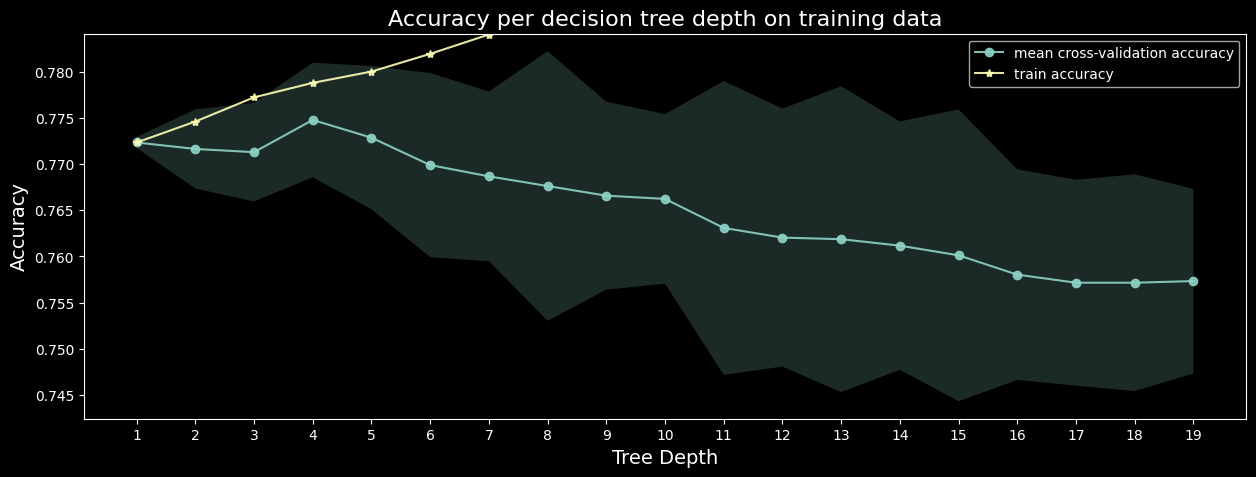

In [42]:
# Plotting Accuracy
plt_cv_results(tree_depths,m_scores_mean,m_scores_std,m_accuracy_scores,
               'Accuracy per decision tree depth on training data')

In [43]:
# Choosing the best depth
idx_max = m_scores_mean.argmax()
m_best_tree_depth = tree_depths[idx_max]
m_best_tree_cv_score = m_scores_mean[idx_max]
m_best_tree_cv_score_std = m_scores_std[idx_max]

print('The depth- {} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
m_best_tree_depth, round(m_best_tree_cv_score*100, 3), round(m_best_tree_cv_score_std*100, 3)))

The depth- 4 tree achieves the best mean cross-validation accuracy 77.479 +/- 0.31% on training dataset


In [44]:
#Function to train and evaluate a tree
def single_tree(X_train, y_train, y_test, depth):
    model = DecisionTreeClassifier(max_depth = depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train,y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100, 3), '%')
    print('Accuracy, Test set: ', round(accuracy_test*100, 3), '%')
    return accuracy_train, accuracy_test
    

In [45]:
#Train and evaluate a 4 depth tree
depth_accuracy_train,depth_accuracy_test = single_tree(X_train, y_train,y_test, m_best_tree_depth)

Single tree depth:  4
Accuracy, Training Set:  77.881 %
Accuracy, Test set:  76.466 %


In [47]:
#Prediction using new data
import pandas

test_df = pandas.read_csv("data/test_data.csv")

In [ ]:
predicted_values = model.predict(test_array)